In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from datetime import datetime
from imblearn.under_sampling import RandomUnderSampler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
# import LazyRegressor

In [3]:
#loading training and testing data
Data_12month_booking = pd.read_csv('12month_flight_booking.csv')
Data_12month_revenue = pd.read_csv('12months_flight_revenue.csv')
Data_3month_booking = pd.read_csv('3months_flight_booking_prediction.csv')
Data_3month_revenue = pd.read_csv('3months_flight_revenue_prediction.csv')

In [5]:
Data_12month_revenue.head()

,Unnamed: 0,Origin,Destination,Cabin,Booking Class,Booking Class Fare USD,Airline,Flight number,Dep_Date,Dep_time,...,Class RDay Rev RDay: 9,Class RDay Rev RDay: 8,Class RDay Rev RDay: 7,Class RDay Rev RDay: 6,Class RDay Rev RDay: 5,Class RDay Rev RDay: 4,Class RDay Rev RDay: 3,Class RDay Rev RDay: 2,Class RDay Rev RDay: 1,Class RDay Rev RDay: 0
0,0,BBB,DDD,Y,N,NaN,AA,304,2022-04-10,05:55,...,323.20,323.20,323.20,323.20,323.20,323.20,323.20,323.20,323.20,323.20
1,1,BBB,DDD,Y,T,NaN,AA,304,2022-04-10,05:55,...,357.57,357.57,357.57,357.57,357.57,357.57,357.57,357.57,357.57,357.57
2,2,BBB,DDD,Y,E,NaN,AA,304,2022-04-10,05:55,...,187.33,187.33,187.33,187.33,187.33,187.33,187.33,187.33,187.33,187.33
3,3,BBB,DDD,J,D,NaN,AA,304,2022-04-10,05:55,...,630.54,630.54,630.54,630.54,945.81,945.81,945.81,945.81,945.81,945.81
4,4,BBB,DDD,Y,V,NaN,AA,304,2022-04-10,05:55,...,297.36,297.36,297.36,297.36,297.36,297.36,297.36,297.36,446.04,446.04


In [7]:
pd.set_option('display.max_columns', None)
print(Data_12month_booking.columns)

Index(['Unnamed: 0', ' Origin', ' Destination', 'Cabin', 'Booking Class',
       ' Booking Class Fare USD ', 'Airline', 'Flight number', 'Dep_Date',
       'Dep_time',
       ...
       'Class RDay Res Hold Total RDay: 9',
       'Class RDay Res Hold Total RDay: 8',
       'Class RDay Res Hold Total RDay: 7',
       'Class RDay Res Hold Total RDay: 6',
       'Class RDay Res Hold Total RDay: 5',
       'Class RDay Res Hold Total RDay: 4',
       'Class RDay Res Hold Total RDay: 3',
       'Class RDay Res Hold Total RDay: 2',
       'Class RDay Res Hold Total RDay: 1',
       'Class RDay Res Hold Total RDay: 0'],
      dtype='object', length=376)


In [7]:
label_encoder = LabelEncoder()

# For 'Origin' and 'Destination' columns in Data_12month_booking
Data_12month_booking[' Origin'] = label_encoder.fit_transform(Data_12month_booking[' Origin'])
Data_12month_booking[' Destination'] = label_encoder.fit_transform(Data_12month_booking[' Destination'])

In [8]:
# For 'Cabin' column in Data_12month_booking
cabin_mapping = {'Y': 1}  # Map 'Y' to 1
Data_12month_booking['Cabin'] = Data_12month_booking['Cabin'].map(cabin_mapping)

In [9]:
Airline_map = {'AA':1}
Data_12month_booking['Airline'] = Data_12month_booking['Airline'].map(Airline_map)

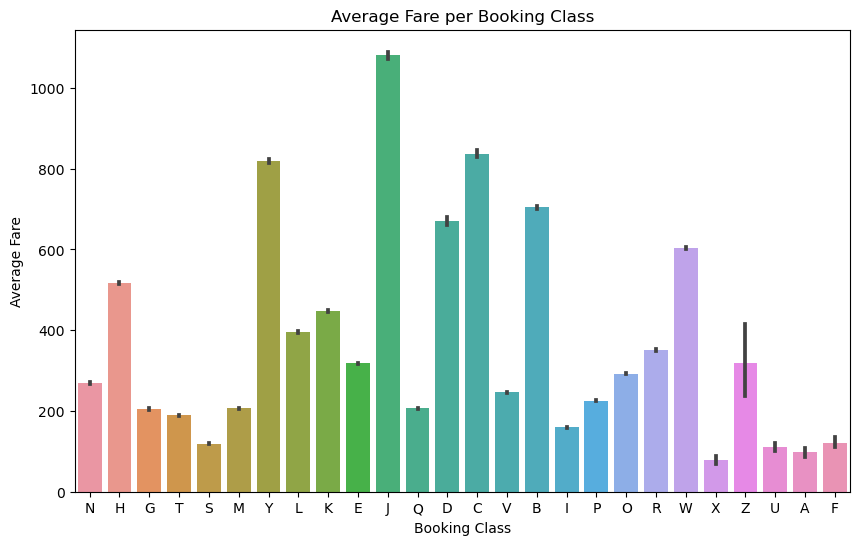

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.barplot(x='Booking Class', y=' Booking Class Fare USD ', data=Data_12month_booking)
plt.title('Average Fare per Booking Class')
plt.xlabel('Booking Class')
plt.ylabel('Average Fare')
plt.show()

In [11]:
label_encoder = LabelEncoder()

# For 'Origin' and 'Destination' columns in Data_12month_booking
Data_3month_booking[' Origin'] = label_encoder.fit_transform(Data_3month_booking[' Origin'])
Data_3month_booking[' Destination'] = label_encoder.fit_transform(Data_3month_booking[' Destination'])

In [12]:
# For 'Cabin' column in Data_12month_booking
cabin_mapping = {'Y': 1}  # Map 'Y' to 1
Data_3month_booking['Cabin'] = Data_3month_booking['Cabin'].map(cabin_mapping)

In [13]:
Airline_map = {'AA':1}
Data_3month_booking['Airline'] = Data_3month_booking['Airline'].map(Airline_map)

In [14]:
label_encoder = LabelEncoder()
Data_12month_booking['Booking Class'] = label_encoder.fit_transform(Data_12month_booking['Booking Class'])


In [15]:
# Convert 'Dep_Date' to a numerical format (e.g., number of days since a specific date)
# Assuming the date is in the format 'YYYY-MM-DD'
Data_12month_booking['Dep_Date'] = pd.to_datetime(Data_12month_booking['Dep_Date'])
Data_12month_booking['Dep_Date_Numerical'] = (Data_12month_booking['Dep_Date'] - pd.to_datetime('2022-01-01')).dt.days

In [16]:
# Split 'Dep_Time' into hours and minutes
Data_12month_booking['Dep_Hour'] = Data_12month_booking['Dep_time'].str.split(':').str[0].astype(int)
Data_12month_booking['Dep_Minute'] = Data_12month_booking['Dep_time'].str.split(':').str[1].astype(int)


In [17]:
# Drop the original 'Dep_Date' and 'Dep_Time' columns
Data_12month_booking = Data_12month_booking.drop(['Dep_Date', 'Dep_time'], axis=1)


In [18]:
# Drop columns with all NaN values
Data_12month_booking.dropna(axis=1, how='all', inplace=True)
# Calculate the threshold for dropping columns
threshold = len(Data_12month_booking) * 0.05  # 5% threshold
Data_12month_booking.dropna(axis=1, thresh=threshold, inplace=True)
Data_12month_booking.fillna(0.00, inplace=True)

In [19]:
label_encoder = LabelEncoder()
Data_3month_booking['Booking Class'] = label_encoder.fit_transform(Data_3month_booking['Booking Class'])
Data_3month_booking['Dep_Date'] = pd.to_datetime(Data_3month_booking['Dep_Date'])
Data_3month_booking['Dep_Date_Numerical'] = (Data_3month_booking['Dep_Date'] - pd.to_datetime('2022-01-01')).dt.days

Data_3month_booking['Dep_Hour'] = Data_3month_booking['Dep_time'].str.split(':').str[0].astype(int)
Data_3month_booking['Dep_Minute'] = Data_3month_booking['Dep_time'].str.split(':').str[1].astype(int)
Data_3month_booking = Data_3month_booking.drop(['Dep_Date', 'Dep_time'], axis=1)

# Drop columns with all NaN values
Data_3month_booking.dropna(axis=1, how='all', inplace=True)
# Calculate the threshold for dropping columns
threshold = len(Data_3month_booking) * 0.05  # 5% threshold
Data_3month_booking.dropna(axis=1, thresh=threshold, inplace=True)
Data_3month_booking.fillna(0.00, inplace=True)


In [25]:
Features = [
    'Booking Class',
    'Dep_Date_Numerical', 'Dep_Hour', 'Dep_Minute'
]

# Features2 from Data_12month_revenue
Features2 = []
for i in range(310):
    feature_name = f'Class RDay Rev RDay: {i}'
    Features2.append(feature_name)

# Merge features into X_train
X_train_booking = Data_12month_booking[Features]
X_train_revenue = Data_12month_revenue[Features2]

# Merge datasets horizontally
X_train = pd.concat([X_train_booking, X_train_revenue], axis=1)  # Features for training
y_train = Data_12month_booking[' Booking Class Fare USD ']  # Target for training

X_test = Data_3month_booking[Features]  # Features for testing
y_test = Data_3month_booking[' Booking Class Fare USD ']  # Target for testing

In [21]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
# from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import StackingRegressor, VotingRegressor
import statsmodels.api as sm

In [26]:
# Understanding the feature importance of various features using LinearRegression model
# we cannot get feature importance for LinearRegression model
# we have to use stats model for the data in order to get p values

#fittng the model using the training data
X_train = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train).fit()

print(model.summary())

X_test = sm.add_constant(X_test)
y_pred = model.predict(X_test)

print("Predicted values for the test set are: ")
print(y_pred)

# 1. The coefficients tell you the estimated change in the target variable for a one-unit change in the corresponding feature.
# 2. The p-values (P>|t|) indicate the statistical significance of each feature. If the p-value is less than your 
# chosen significance level (e.g., 0.05), you can reject the null hypothesis that the coefficient is zero.
# 3. The confidence intervals show the range within which you can be reasonably confident that the true population parameter lies.

# For example, taking the 'Origin' feature:

# 1. Coefficient: 51.9524 - This suggests that, on average, an increase of one unit in 
# the 'Origin' is associated with an increase of 51.9524 in the target variable.
# 2. P-value: 0.000 - This is very small, indicating that 'Origin' is likely a statistically significant predictor.
# 3. Confidence Interval: (50.884, 53.021) - We can be reasonably confident that the true population parameter for 'Origin' lies within this range.

MissingDataError: exog contains inf or nans

In [23]:
#Understanding the feature importance of various columns using Lasso
model = Lasso()

# Fit the model using the training data
# model1.fit(X_train, y_train)
model.fit(X_train, y_train)


# Make predictions using the test data
# predictions1 = model1.predict(X_test)
predictions = model.predict(X_test)


feature_importance = model.coef_


# Pairing each feature with its importance
feature_effects = dict(zip(Features, feature_importance))

# Display feature effects
for feature, effect in feature_effects.items():
    print(f"Feature: {feature}, Importance: {effect}")

Feature:  Origin, Importance: 51.03638135022181
Feature:  Destination, Importance: 64.72925476972851
Feature: Cabin, Importance: -494.1749469094808
Feature: Booking Class, Importance: 2.0468022241522967
Feature: Airline, Importance: 0.0
Feature: Flight number, Importance: 0.13194032934703964
Feature: Dep_Date_Numerical, Importance: 0.054143470674791944
Feature: Dep_Hour, Importance: 6.559179014107535
Feature: Dep_Minute, Importance: -1.552666512966778
Feature: Class RDay Res Hold Total RDay: 0, Importance: -1.5167468088187934
Feature: Class RDay Res Hold Total RDay: 1, Importance: 2.475055729470276
Feature: Class RDay Res Hold Total RDay: 2, Importance: -2.3231898232059205
Feature: Class RDay Res Hold Total RDay: 3, Importance: -0.4581195254422446
Feature: Class RDay Res Hold Total RDay: 4, Importance: -0.0
Feature: Class RDay Res Hold Total RDay: 5, Importance: -0.5974413349640756
Feature: Class RDay Res Hold Total RDay: 6, Importance: -0.0
Feature: Class RDay Res Hold Total RDay: 7, 